In [1]:
import pandas as pd
data=pd.read_csv('Downloads/Data science/Sales_add.csv')
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [6]:
data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [7]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

#  1.Whether there is any increase in sales afterstepping into digital marketing.

H0:mean sale after digital marketing >mean sale before digital marketing

H1:mean sale after digital marketing <= mean sale before digital marketing

In [3]:
import numpy as np
import scipy
from scipy import stats as stat
value=stat.ttest_ind(data['Sales_After_digital_add(in $)'],data['Sales_before_digital_add(in $)'],alternative='less')
print('T Statistic value is',value[0])
print('pvalue is', value[1])


T Statistic value is 12.995084451110877
pvalue is 0.9999999999999999


Since pvalue>0.05 we accept the null hypothesis. Digital marketing helped the company in their sales. There is an increase in sale after the digital marketing.

# 2.Check whether there is any dependency between the features Region and Manager

<AxesSubplot:xlabel='Region', ylabel='count'>

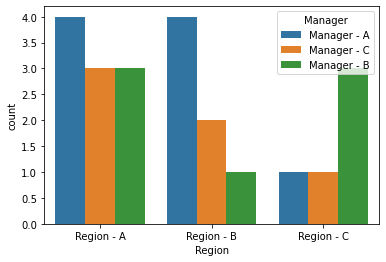

In [12]:
import seaborn as sns
sns.countplot(x='Region',hue='Manager',data=data)

Considering Region A and B Manager A is highest in count. In C, Manager B is highest in count.

In [29]:
d1=data.groupby('Region').get_group('Region - A')
d1.groupby('Manager').mean()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
Manager,,
Manager - A,148628.5,257609.25
Manager - B,155617.0,218944.00
Manager - C,140228.0,233754.00


In [30]:
d2=data.groupby('Region').get_group('Region - B')
d2.groupby('Manager').mean()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
Manager,,
Manager - A,142725.0,234962.75
Manager - B,152167.0,231808.00
Manager - C,165299.0,214718.00


In [31]:
d3=data.groupby('Region').get_group('Region - C')
d3.groupby('Manager').mean()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
Manager,,
Manager - A,147463.000000,229336.000000
Manager - B,156492.333333,214551.333333
Manager - C,130625.000000,222106.000000


Result 1:Consider the mean sales after digital add of Manager A,B,C of 3 regions. In above 3 regions sales of Manager A working was highest. In region A and B, manager A count is highest but in C manager B is highest.

<AxesSubplot:xlabel='Manager', ylabel='count'>

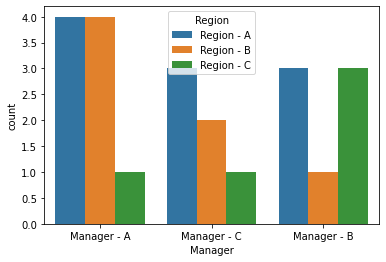

In [13]:
import seaborn as sns
sns.countplot(x='Manager',hue='Region',data=data)

Count of manager A is highest in region A and B. Count of manager C is highest in region A. Count of manager B is highest in region A and C. 

In [33]:
d4=data.groupby('Manager').get_group('Manager - A')
d4.groupby('Region').mean()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
Region,,
Region - A,148628.5,257609.25
Region - B,142725.0,234962.75
Region - C,147463.0,229336.00


In [34]:
d5=data.groupby('Manager').get_group('Manager - B')
d5.groupby('Region').mean()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
Region,,
Region - A,155617.000000,218944.000000
Region - B,152167.000000,231808.000000
Region - C,156492.333333,214551.333333


In [35]:
d6=data.groupby('Manager').get_group('Manager - C')
d6.groupby('Region').mean()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
Region,,
Region - A,140228,233754
Region - B,165299,214718
Region - C,130625,222106


Result 2:Sales after add of manager A is highest in region A.Sales after add of manager B is highest in region B.Sales after add of manager A is highest in region C.

In [36]:
# From above two results it is clear that no dependency between region and manager. 
#Because in region B first result shows Manager A have highest sales but from second result manager B have highest sales.